## 별첨) 항공기 운용 현황

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [38]:
filename = 'data/airports.xlsx'

In [40]:
airports_df = pd.read_excel(filename)
airports_df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,시계열 통계,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,검색 기간,2019.01~2022.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,공항 구분,전체,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,노선 구분,전체,운항 구분,전체,여객화물 구분,전체,여객 구분,전체,화물 구분,전체,연도/월 구분,전체
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,공항명,연도,월,운항(편),NaN,NaN,여객(명),NaN,NaN,화물(톤),NaN,NaN
6,NaN,NaN,NaN,도착,출발,계,도착,출발,계,도착,출발,계
7,전체,2019,01,"38,580","38,624","77,204","6,492,609","6,716,902","13,209,511","187,445.6","194,870.7","382,316.3"
8,전체,2019,02,"35,057","35,048","70,105","6,277,383","6,176,872","12,454,255","165,762.5","162,783.7","328,546.2"
9,전체,2019,03,"38,369","38,359","76,728","6,503,371","6,243,715","12,747,086","199,865.1","196,202.5","396,067.7"


In [41]:
df = pd.read_excel(filename, sheet_name=0, header=[7], dtype='str')
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,도착,출발,계,도착.1,출발.1,계.1,도착.2,출발.2,계.2
0,전체,2019,01,"38,580","38,624","77,204","6,492,609","6,716,902","13,209,511","187,445.6","194,870.7","382,316.3"
1,전체,2019,02,"35,057","35,048","70,105","6,277,383","6,176,872","12,454,255","165,762.5","162,783.7","328,546.2"
2,전체,2019,03,"38,369","38,359","76,728","6,503,371","6,243,715","12,747,086","199,865.1","196,202.5","396,067.7"
3,전체,2019,04,"37,647","37,645","75,292","6,543,247","6,475,271","13,018,518","183,666.3","187,525.2","371,191.5"
4,전체,2019,05,"39,521","39,537","79,058","6,610,475","6,687,916","13,298,391","185,191","184,893.9","370,084.9"


In [11]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', '도착', '출발', '계', '도착.1',
       '출발.1', '계.1', '도착.2', '출발.2', '계.2'],
      dtype='object')

In [12]:
df = df.drop(['Unnamed: 0', '도착', '출발', '도착.1', '출발.1', '도착.2', '출발.2'], axis=1)

In [13]:
df.head(5)

,Unnamed: 1,Unnamed: 2,계,계.1,계.2
0,2019,1.0,"77,204","13,209,511","382,316.3"
1,2019,2.0,"70,105","12,454,255","328,546.2"
2,2019,3.0,"76,728","12,747,086","396,067.7"
3,2019,4.0,"75,292","13,018,518","371,191.5"
4,2019,5.0,"79,058","13,298,391","370,084.9"


In [14]:
df.columns

Index(['Unnamed: 1', 'Unnamed: 2', '계', '계.1', '계.2'], dtype='object')

In [15]:
# df.columns['연도', '월', '운항(편)', '여객(명)', '화물(톤)']
df.rename(columns = {'Unnamed: 1':'연도','Unnamed: 2':'월', '계':'운항(편)', '계.1':'여객(명)', '계.2':'화물(톤)' },inplace=True)

In [16]:
df.head()

,연도,월,운항(편),여객(명),화물(톤)
0,2019,1.0,"77,204","13,209,511","382,316.3"
1,2019,2.0,"70,105","12,454,255","328,546.2"
2,2019,3.0,"76,728","12,747,086","396,067.7"
3,2019,4.0,"75,292","13,018,518","371,191.5"
4,2019,5.0,"79,058","13,298,391","370,084.9"


In [17]:
df1 = df.drop([12, 25, 38, 44, 45], axis=0)
df1.head(5)

,연도,월,운항(편),여객(명),화물(톤)
0,2019,1.0,"77,204","13,209,511","382,316.3"
1,2019,2.0,"70,105","12,454,255","328,546.2"
2,2019,3.0,"76,728","12,747,086","396,067.7"
3,2019,4.0,"75,292","13,018,518","371,191.5"
4,2019,5.0,"79,058","13,298,391","370,084.9"


In [18]:
df1['기준년월'] = ''
df1.head(5)

,연도,월,운항(편),여객(명),화물(톤),기준년월
0,2019,1.0,"77,204","13,209,511","382,316.3",
1,2019,2.0,"70,105","12,454,255","328,546.2",
2,2019,3.0,"76,728","12,747,086","396,067.7",
3,2019,4.0,"75,292","13,018,518","371,191.5",
4,2019,5.0,"79,058","13,298,391","370,084.9",


In [19]:
df1.dtypes

연도        object
월        float64
운항(편)     object
여객(명)     object
화물(톤)     object
기준년월      object
dtype: object

In [20]:
# pd.options.display.float_format = '{:,.0f}'.format
# df1.head()

In [21]:
df2 = df1.astype({'월':'int'})
df2 = df2.astype({'연도':'int'})
df2.dtypes

연도        int32
월         int32
운항(편)    object
여객(명)    object
화물(톤)    object
기준년월     object
dtype: object

In [22]:
df2.dtypes

연도        int32
월         int32
운항(편)    object
여객(명)    object
화물(톤)    object
기준년월     object
dtype: object

In [23]:
df2 = df2.astype({'연도':'str'})
df2 = df2.astype({'월':'str'})
df2.dtypes

연도       object
월        object
운항(편)    object
여객(명)    object
화물(톤)    object
기준년월     object
dtype: object

In [24]:
df2['기준년월'] = df2['연도'] + "." + df2['월']
df2.head()

,연도,월,운항(편),여객(명),화물(톤),기준년월
0,2019,1,"77,204","13,209,511","382,316.3",2019.1
1,2019,2,"70,105","12,454,255","328,546.2",2019.2
2,2019,3,"76,728","12,747,086","396,067.7",2019.3
3,2019,4,"75,292","13,018,518","371,191.5",2019.4
4,2019,5,"79,058","13,298,391","370,084.9",2019.5


In [45]:
df2["기준년월"].values

array(['2019.1', '2019.2', '2019.3', '2019.4', '2019.5', '2019.6',
       '2019.7', '2019.8', '2019.9', '2019.10', '2019.11', '2019.12',
       '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6',
       '2020.7', '2020.8', '2020.9', '2020.10', '2020.11', '2020.12',
       '2021.1', '2021.2', '2021.3', '2021.4', '2021.5', '2021.6',
       '2021.7', '2021.8', '2021.9', '2021.10', '2021.11', '2021.12',
       '2022.1', '2022.2', '2022.3', '2022.4', '2022.5'], dtype=object)

In [59]:
x_val = list()

for val in list(df2["기준년월"].values):
    val = val[2:]
    x_val.append(val)
    
x_val[:5]

['19.1', '19.2', '19.3', '19.4', '19.5']

In [25]:
y_val = list()
for val in list(df2["운항(편)"].values):
    val = val.replace(',', '')
    val = val.strip()
    val = int(val)
    y_val.append(val)
    
y_val[:5]    

[77204, 70105, 76728, 75292, 79058]

In [84]:
help(plt.annotate)

Help on function annotate in module matplotlib.pyplot:

annotate(text, xy, *args, **kwargs)
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'
    
        The coordinate system that *xy* is given in. The following types
        of values are supported:
    
        - One of the fo

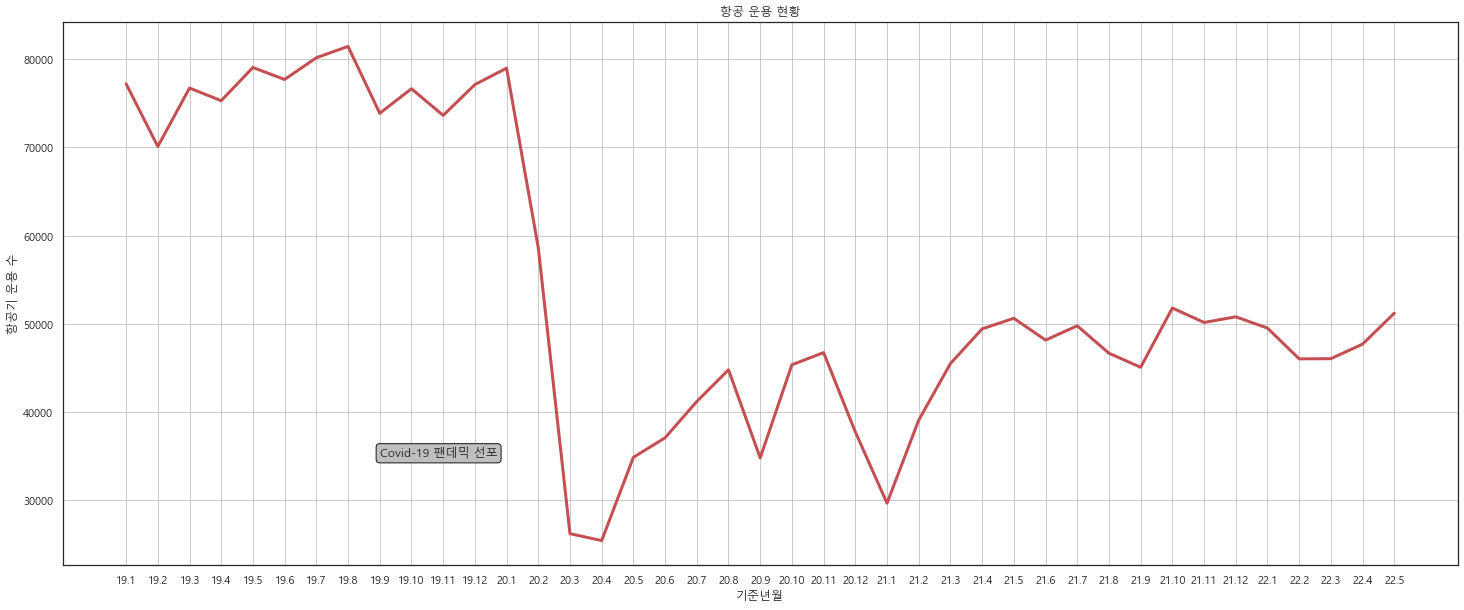

In [87]:
fig = plt.figure(figsize=(25, 10))
sns.set(style="white", font="Malgun Gothic")

box = {
    'facecolor' : '.75',
    'edgecolor' : 'k',
    'boxstyle'  : 'round'
}

plt.annotate('Backmard minimum',
            ha = 'center',
            va = 'bottom',
            xytext = (10, 300000),
            xy = (10, 300000),
            arrowprops = { 'facecolor' : 'black', 
                           'shrink' : 0.05})


plt.plot(x_val, y_val,  color='r', label="운항(편)", linestyle='solid', linewidth=3)
# plt.plot(df2['기준년월'], y_val2, color='b', label="여객(명)")
# plt.plot(df2['기준년월'], y_val3, color='y', label="화물(톤)")
plt.rc('font', family='Malgun Gothic')
plt.grid()
plt.text(8, 35000, 'Covid-19 팬데믹 선포', bbox=box)
plt.ylabel("항공기 운용 수")
plt.xlabel("기준년월")
plt.title('항공 운용 현황')
# plt.legend()
plt.show()

In [26]:
y_val2 = list()
for val in list(df2["여객(명)"].values):
    val = val.replace(',', '')
    val = val.strip()
    val = int(val)
    y_val2.append(val)
    
y_val2[:5]   

[13209511, 12454255, 12747086, 13018518, 13298391]

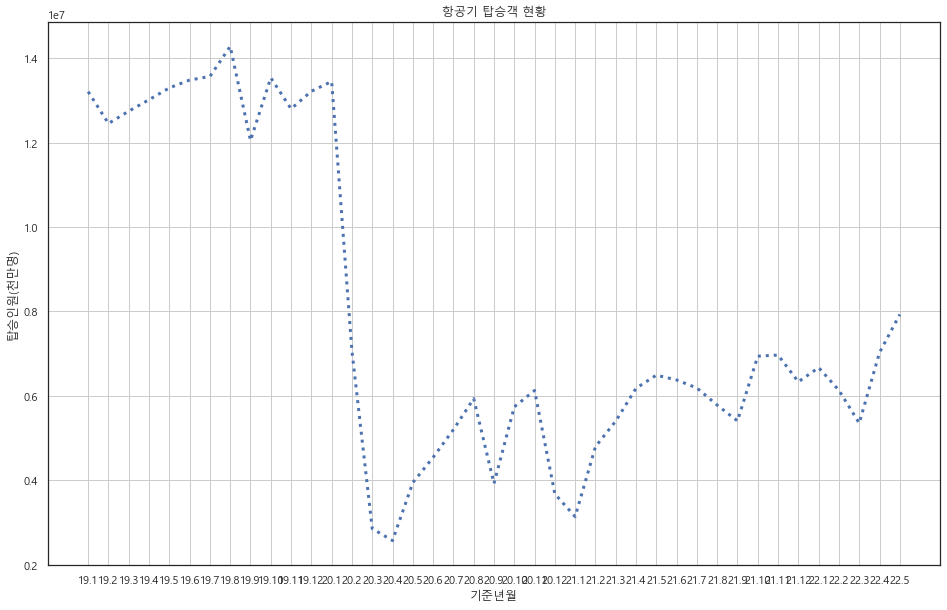

In [70]:
fig = plt.figure(figsize=(16, 10))
sns.set(style="white", font="Malgun Gothic")

# plt.plot(x_val, y_val,  color='r', label="운항(편)", linestyle='solid', linewidth=3)
plt.plot(x_val, y_val2, color='b', label="여객(명)", linestyle='dotted', linewidth=3)
# plt.plot(df2['기준년월'], y_val3, color='y', label="화물(톤)")

plt.rc('font', family='Malgun Gothic')
plt.grid()
plt.ylabel("탑승인원(천만명)")
plt.xlabel("기준년월")
plt.title('항공기 탑승객 현황')
# plt.legend()
plt.show()

In [32]:
y_val3 = list()
for val in list(df2["화물(톤)"].values):
    val = val.replace(',', '')
    val = val.strip()
    val = float(val)
    y_val3.append(val)
    
y_val3[:5]

[382316.3, 328546.2, 396067.7, 371191.5, 370084.9]

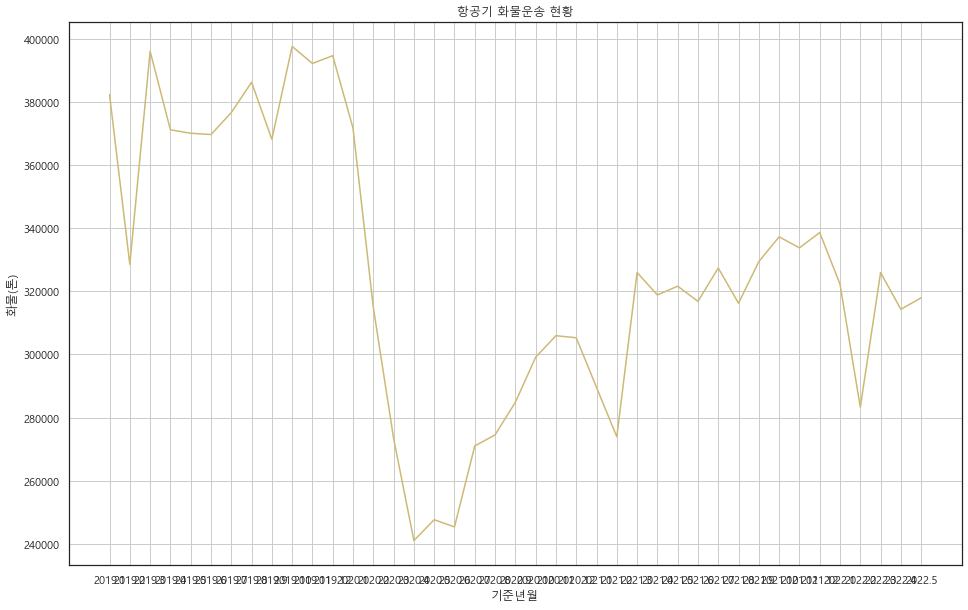

In [44]:
fig = plt.figure(figsize=(16, 10))
sns.set(style="white", font="Malgun Gothic")

# plt.plot(df2['기준년월'], y_val,  color='r', label="운항(편)")
# plt.plot(df2['기준년월'], y_val2, color='b', label="여객(명)")
plt.plot(df2['기준년월'], y_val3, color='y', label="화물(톤)")

plt.rc('font', family='Malgun Gothic')
plt.grid()
plt.ylabel("화물(톤)")
plt.xlabel("기준년월")
plt.title('항공기 화물운송 현황')
# plt.legend()
plt.show()